<a href="https://colab.research.google.com/github/gyujin0450/RPRG_PARTIII/blob/main/p368_%EC%B2%99%EB%8F%84%EB%B3%84%EA%B8%B0%EC%88%A0%ED%86%B5%EA%B3%84%EB%9F%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ch11. 척도별 기술통계량 구하기

In [40]:
raw_data <- read.csv("descriptive.csv", header = T)
data <- raw_data

In [22]:
head(data)

,resident,gender,age,level,cost,type,survey,pass
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,1,1,50,1,5.1,1,1,2
2,2,1,54,2,4.2,1,2,2
3,NA,1,62,2,4.7,1,1,1
4,4,2,50,NA,3.5,1,4,1
5,5,1,51,1,5.0,1,3,1
6,3,1,55,2,5.4,1,3,NA


In [23]:
str(data)

'data.frame':	300 obs. of  8 variables:
 $ resident: int  1 2 NA 4 5 3 2 5 NA 2 ...
 $ gender  : int  1 1 1 2 1 1 2 1 1 1 ...
 $ age     : int  50 54 62 50 51 55 56 49 49 49 ...
 $ level   : int  1 2 2 NA 1 2 1 2 1 2 ...
 $ cost    : num  5.1 4.2 4.7 3.5 5 5.4 4.1 675 4.4 4.9 ...
 $ type    : int  1 1 1 1 1 1 1 NA 1 1 ...
 $ survey  : int  1 2 1 4 3 3 NA NA NA 1 ...
 $ pass    : int  2 2 1 1 1 NA 2 2 2 1 ...


In [5]:
# resident : 거주지역(명목척도)
# gender : 성별(명목척도)
# age : 나이(비율척도)
# level : 학력수준(서열척도)
# cost : 생활비(비율척도)
# type : 학교유형(명목척도)
# survey : 만족도(등간척도)
# pass : 합격여부(명목척도)

In [24]:
summary(data)

    resident         gender          age            level      
 Min.   :1.000   Min.   :0.00   Min.   :40.00   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.00   1st Qu.:48.00   1st Qu.:1.000  
 Median :2.000   Median :1.00   Median :53.00   Median :2.000  
 Mean   :2.233   Mean   :1.42   Mean   :53.88   Mean   :1.836  
 3rd Qu.:3.000   3rd Qu.:2.00   3rd Qu.:60.00   3rd Qu.:2.000  
 Max.   :5.000   Max.   :5.00   Max.   :69.00   Max.   :3.000  
 NA's   :21                                     NA's   :13     
      cost               type          survey          pass      
 Min.   :-457.200   Min.   :1.00   Min.   :1.00   Min.   :1.000  
 1st Qu.:   4.425   1st Qu.:1.00   1st Qu.:2.00   1st Qu.:1.000  
 Median :   5.400   Median :1.00   Median :3.00   Median :1.000  
 Mean   :   8.752   Mean   :1.27   Mean   :2.61   Mean   :1.432  
 3rd Qu.:   6.300   3rd Qu.:2.00   3rd Qu.:3.00   3rd Qu.:2.000  
 Max.   : 675.000   Max.   :2.00   Max.   :5.00   Max.   :2.000  
 NA's   :30         NA's  

2.1 명목척도 기술통계량

In [37]:
table(data$gender)


  0   1   2   5 
  2 173 124   1 

In [41]:
# 이상치 제거 : 결측 처리 --> data 손실 X
data$gender <- ifelse(data$gender == 0 | data$gender == 5, NA, data$gender) # dim(data) = 300 * 8 
# 이상치 제거 : 정상치제외 --> dataㅅ곤상
# data <- subset(data, gender == 1 | gender ==2) # dim(data) = 297*8

In [43]:
table(data$gender)


  1   2 
173 124 

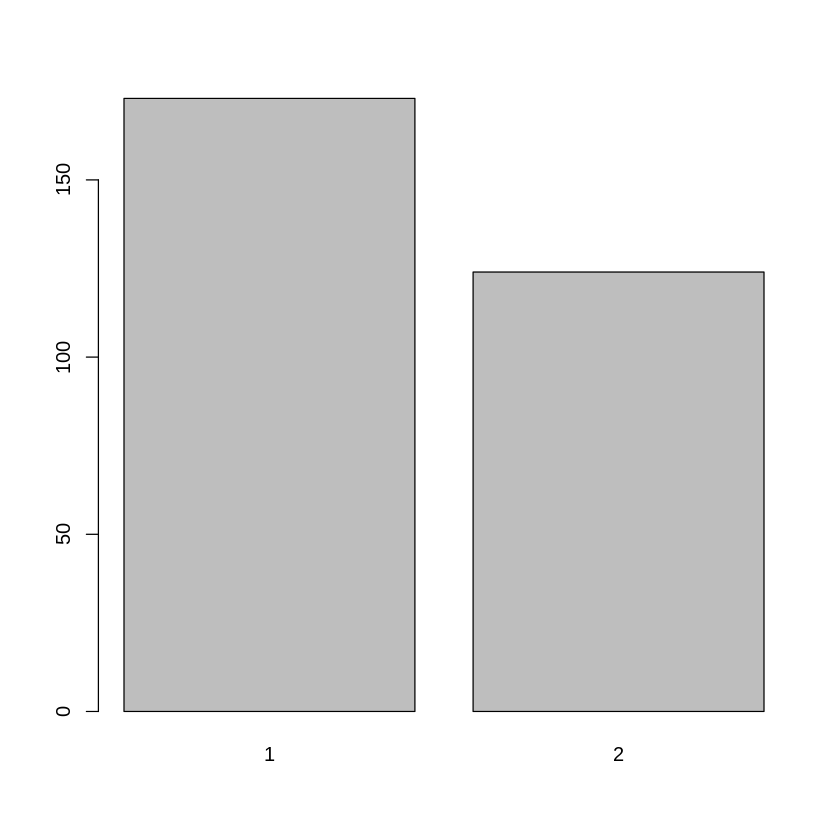

In [29]:
x <- table(data$gender)
barplot(x)

In [31]:
# 구성비율 계산
round(prop.table(x)*100,2)


    1     2 
58.25 41.75 

2.2 서열척도 기술통계량

In [13]:
table(data$level)


  1   2   3 
117 100  70 

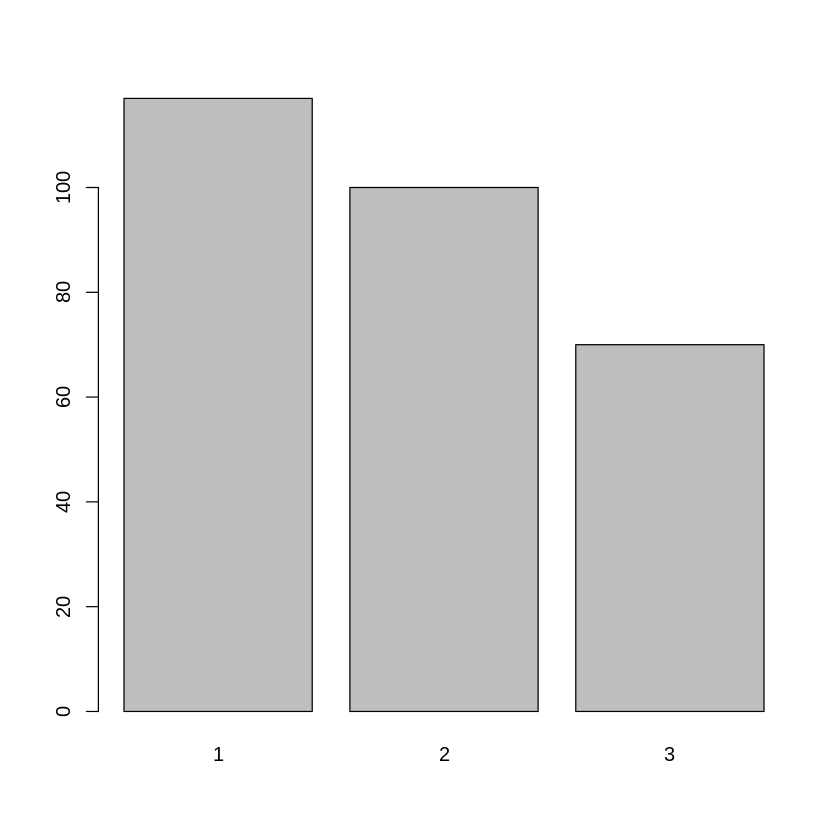

In [44]:
y <- table(data$level)
barplot(y) # 명목/서열척도 -> 막대차트

2.3 등간척도 기술통계량